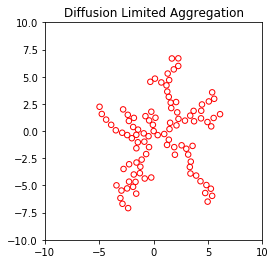

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

attractor = [np.array([0,0])]
steptypes = ((-1,0), (+1,0), (0,+1), (0, -1))
stepsize = 0.1
numparticles = 100
partrad = 0.3
squaresize = 10
spawnradius = 8.0


def CheckBoundary(p):
    c = 1.1*partrad
    if (p[0] < -squaresize):
        p[0] = -squaresize + c
    elif (p[0] > squaresize):    
        p[0] = squaresize - c
        
    if (p[1] < -squaresize):    
        p[1] = -squaresize + c
    elif (p[1] > squaresize):    
        p[1] = squaresize - c
        
    return p

def NextStep():  
    sx,sy = steptypes[random.randint(1,4)-1]
    return np.array([stepsize*sx,stepsize*sy])



for i in range(numparticles):
    free = True
    t = random.uniform(0.0,2.0*np.pi)
    pos = np.array([spawnradius*np.cos(t),spawnradius*np.sin(t)])    
    while (free):        
        for attpoint in attractor:            
            d = np.linalg.norm(pos-attpoint)            
            if (d < 2.0*partrad):
                free = False
                pos = attpoint + (2.0*partrad/d)*(pos-attpoint)                
                attractor.append(pos)
                break
        pos += NextStep()
        pos = CheckBoundary(pos)
        

plt.scatter(*zip(*attractor),s=30.0,facecolors='none', edgecolors='r')
plt.ylabel('')
plt.xlabel('')
plt.title('Diffusion Limited Aggregation')
plt.axis([-squaresize,squaresize,-squaresize,squaresize])
plt.gca().set_aspect('equal')
plt.show()